##Data
The data for this project was downloaded from Kaggle:

https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset

##Loading the Data
- The `pandas` library is used to import the csv file and load the data
- The `numpy` library is used to perform calculations
- The `matplotlib` & `seaborn` libraries are used to generate visualizations
- The `re` libraries is used to clean the data using regular expressions

In [81]:
#import necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [82]:
products = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Databases/Amazon-Products.csv')
pd.set_option('display.max_columns', None)
products.head(5) #inspect the first 5 rows

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,211,"FIGMENT Dancing Cactus Talking Toy, Cactus Plu...",toys & baby products,Toys & Games,https://m.media-amazon.com/images/I/71Cr+OlWx7...,https://www.amazon.in/FIGMENT-Recording-Educat...,5.0,99,₹699,₹999
1,923,RAWLS Hydrating Under Eye Cream Gel/Enriched w...,beauty & health,Health & Personal Care,https://m.media-amazon.com/images/I/51qpiSn9Kn...,https://www.amazon.in/RAWLS-Hydrating-Enriched...,5.0,81,₹560,₹700
2,3316,"COROID-Table Fan High Speed, Powerful Recharge...",appliances,All Appliances,https://m.media-amazon.com/images/I/71TMEhOp41...,https://www.amazon.in/COROID-Table-Powerful-Re...,5.0,78,₹999,"₹4,499"
3,642,"COROID-Table Fan High Speed, Powerful Recharge...",appliances,Heating & Cooling Appliances,https://m.media-amazon.com/images/I/71TMEhOp41...,https://www.amazon.in/COROID-Table-Powerful-Re...,5.0,78,₹999,"₹4,499"
4,2559,"COROID-Table Fan High Speed, Powerful Recharge...",appliances,Kitchen & Home Appliances,https://m.media-amazon.com/images/I/71TMEhOp41...,https://www.amazon.in/COROID-Table-Powerful-Re...,5.0,78,₹999,"₹4,499"


In [83]:
products.columns #preview the columns' name

Index(['Unnamed: 0', 'name', 'main_category', 'sub_category', 'image', 'link',
       'ratings', 'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [84]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545352 entries, 0 to 545351
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      545352 non-null  int64  
 1   name            545352 non-null  object 
 2   main_category   545352 non-null  object 
 3   sub_category    545352 non-null  object 
 4   image           545352 non-null  object 
 5   link            545352 non-null  object 
 6   ratings         369558 non-null  float64
 7   no_of_ratings   369558 non-null  object 
 8   discount_price  484705 non-null  object 
 9   actual_price    527539 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 41.6+ MB


## Data Information
- There are 10 columns & 545,352 rows
- Some columns have missing values
- Most of the data types are object
- The `no_of_ratings`, `discount_price`, `actual_price` are neither `int` or `float`, data cleaning is needed to perform numerical calculations
- The `Unnamed: 0` column does not have any meaning, so it should be cleared from the table

## Data Cleaning
There are two main tasks for the data cleaning process:
1. Change numerical data to `float` for numerical calculations
  - Remove the comma character from `no_of_ratings` columns and change it into `int`
  - Remove the comma character and `₹` character from `discount_price` & `actual_price` columns and change them into float
2. Clean `null` values
  - Drop rows where there is no `actual_price`, as these products do not offer any insights about product sales
  - Products with no `discount_price` are assumed to be not discounted, so `null` values in this columns will be filled with their corresponding `actual_price`
  - Products with no ratings are assumed to have made 0 sales, therefore rows with null values in `no_of_ratings` will be dropped
3. Drop the `Unnamed: 0` column from the table
4. Drop the duplicates from the `name` column to retain only unique products


In [85]:
products.isnull().sum() #Check for number of null values

Unnamed: 0             0
name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           175794
no_of_ratings     175794
discount_price     60647
actual_price       17813
dtype: int64

In [86]:
products = products.dropna(subset=['actual_price'], axis=0) #filter n/a actual_price
products = products.fillna(value = {'discount_price': products.actual_price}) #set n/a discounted_price to be equal to actual_price
products = products.dropna(subset=['ratings', 'no_of_ratings'], how='any') #filter n/a ratings & no_of_ratings
products.isnull().sum()

Unnamed: 0        0
name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

In [87]:
#drop the first column which offers meaningless data
products = products.drop('Unnamed: 0', axis=1)

#remove unnecessary characters & turn numerical variables from object to float
products.no_of_ratings = products.no_of_ratings.replace('[,]', '', regex=True).astype(int)
products.discount_price = products.discount_price.replace('[\₹]', '', regex=True).replace('[,]', '', regex=True).astype(float)
products.actual_price = products.actual_price.replace('[\₹]', '', regex=True).replace('[,]', '', regex=True).astype(float)

#drop the duplicates from the name column
products = products.drop_duplicates(subset='name')

products.dtypes

name               object
main_category      object
sub_category       object
image              object
link               object
ratings           float64
no_of_ratings       int64
discount_price    float64
actual_price      float64
dtype: object

In [88]:
products.describe(include = 'all')

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
count,258911,258911,258911,258911,258911,258911.000000,258911.000000,2.589110e+05,2.589110e+05
unique,258911,20,112,250434,258911,NaN,NaN,NaN,NaN
top,"FIGMENT Dancing Cactus Talking Toy, Cactus Plu...",accessories,Clothing,https://m.media-amazon.com/images/I/61ijir6ozP...,https://www.amazon.in/FIGMENT-Recording-Educat...,NaN,NaN,NaN,NaN
freq,1,53200,14720,73,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.843161,715.627992,2.115962e+03,4.189748e+04
std,NaN,NaN,NaN,NaN,NaN,0.781854,7452.184682,7.298593e+03,1.945665e+07
min,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,3.500000,4.000000,3.490000e+02,7.990000e+02
50%,NaN,NaN,NaN,NaN,NaN,3.900000,17.000000,5.990000e+02,1.495000e+03
75%,NaN,NaN,NaN,NaN,NaN,4.300000,110.000000,1.299000e+03,2.875000e+03


### Clean outliers from `discount_price` columns
To make it easier for analysis, outliers from `discount_price` (which is more important than the `actual_price` column since it is the final price that the customers pay) will be cleaned from the data. <br/>
This will be done by creating boxplots of `discount_price` for each `main_category`.

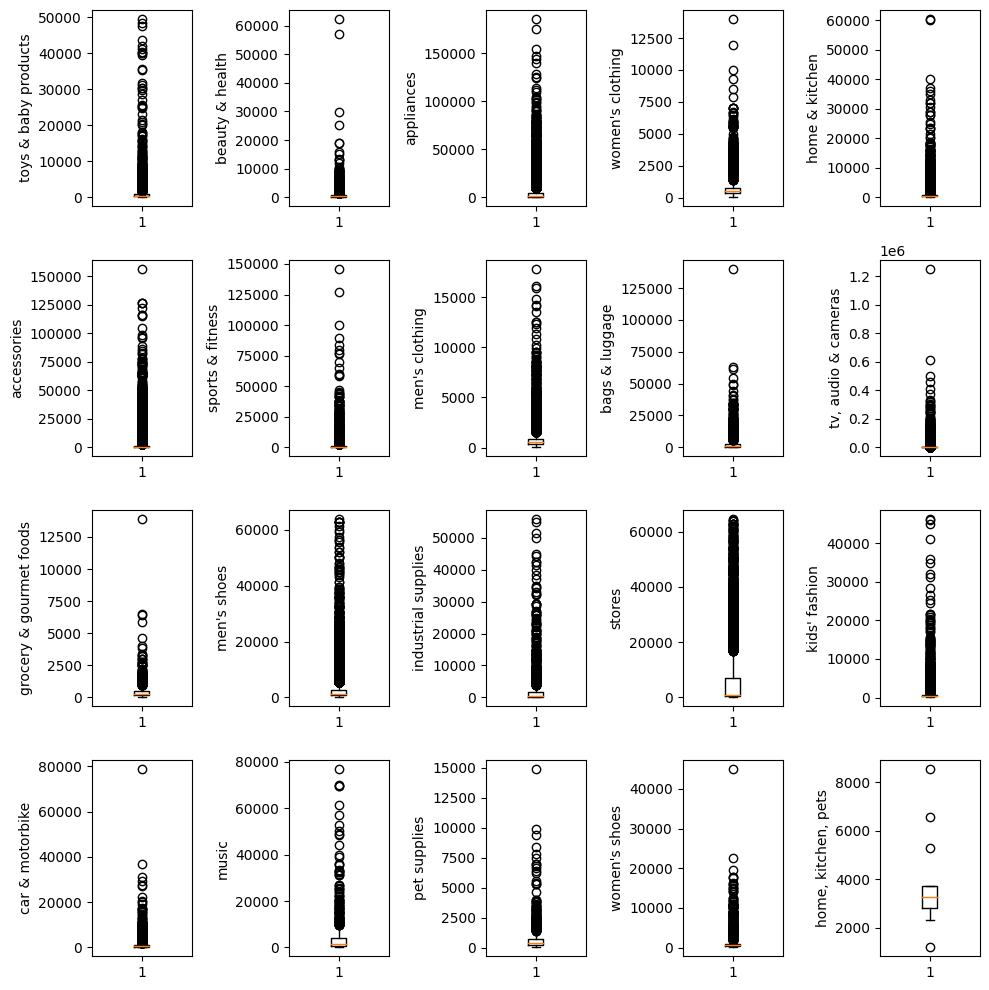

<Figure size 640x480 with 0 Axes>

In [89]:
#create list of main categories
main_categories = products.main_category.unique()

#use boxplot to find outliers
plot = 0
fig = plt.figure(figsize=(10,10))
for category in main_categories:
  plot += 1
  plt.subplot(4, 5, plot)
  plt.boxplot(products[products.main_category == category]['discount_price'])
  plt.ylabel(category)
plt.tight_layout()
plt.show()
plt.clf()

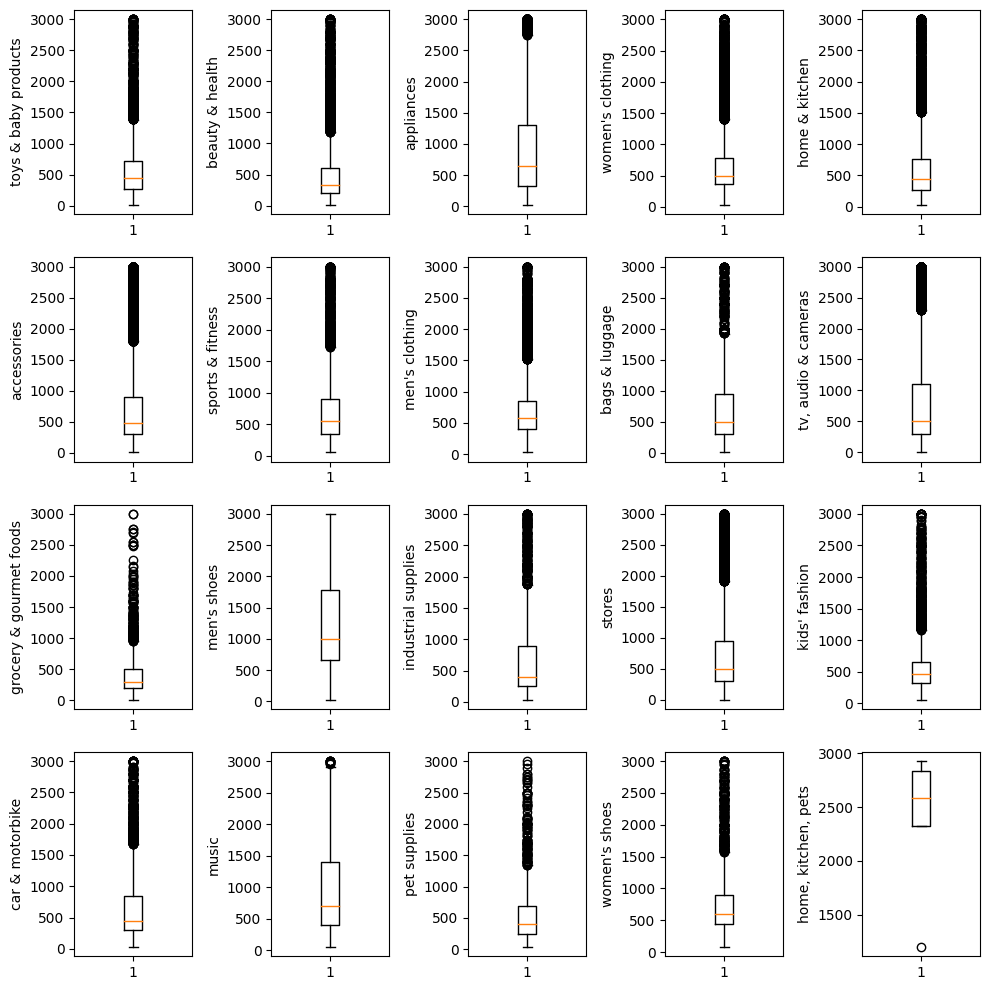

<Figure size 640x480 with 0 Axes>

In [90]:
products = products[products.discount_price < 3000] #remove products that cost >= 3000 rupees

#plotting boxplots for each main category
plot = 0
fig = plt.figure(figsize=(10,10))
for category in main_categories:
  plot += 1
  plt.subplot(4, 5, plot)
  plt.boxplot(products[products.main_category == category]['discount_price'])
  plt.ylabel(category)
plt.tight_layout()
plt.show()
plt.clf()

After removing products that cost 3,000 rupees and above, it can be seen that the outliers in `men's shoes` and `home, kitchen, pets` categories are cleared while the others are not. Next, products that cost 1,500 rupees in the remaining categories will be cleared.

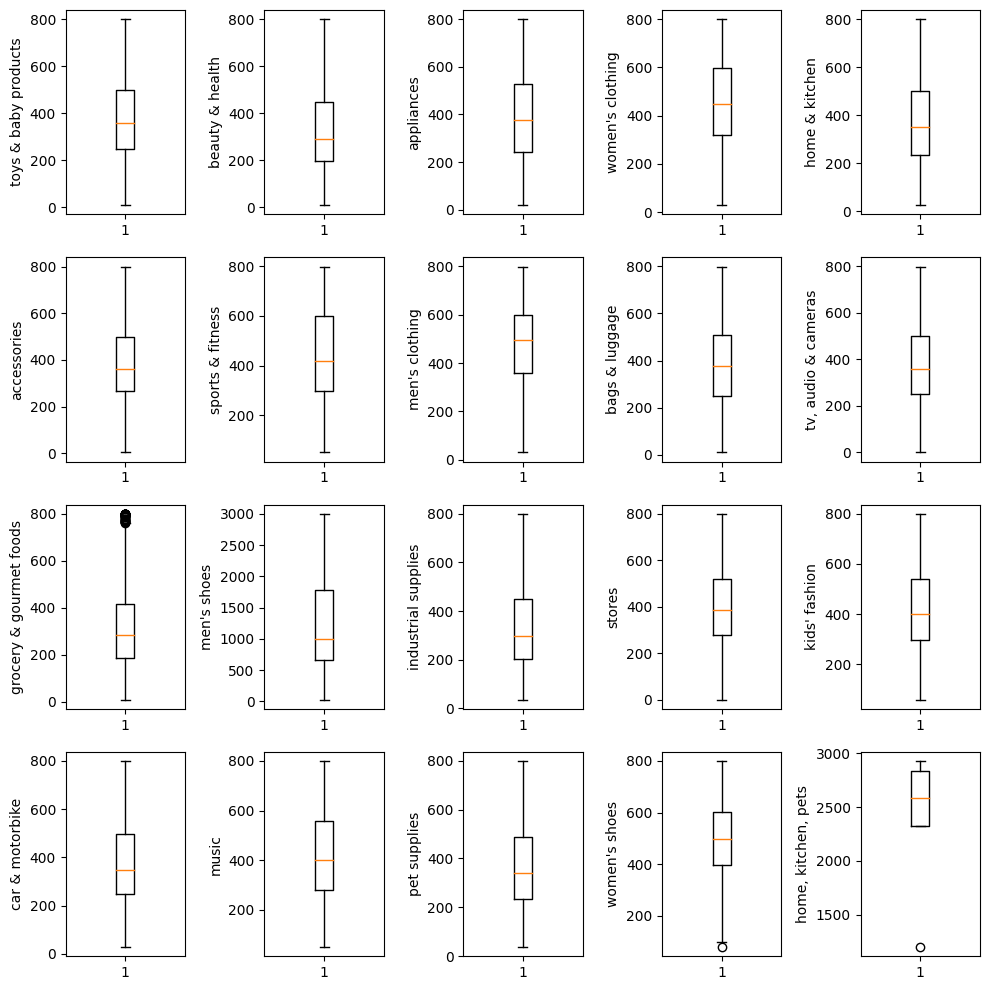

<Figure size 640x480 with 0 Axes>

In [91]:
#remove products that cost >= 1500 rupees
products = products[(products.main_category == 'men\'s shoes') | (products.main_category == 'home, kitchen, pets') | ((products.main_category != 'men\'s shoes') & (products.main_category != 'home, kitchen, pets') & (products.discount_price < 800))]

#plotting the boxplots
plot = 0
fig = plt.figure(figsize=(10,10))
for category in main_categories:
  plot += 1
  plt.subplot(4, 5, plot)
  plt.boxplot(products[products.main_category == category]['discount_price'])
  plt.ylabel(category)
plt.tight_layout()
plt.show()
plt.clf()

## Questions for analysis
To generate some insights about products sales on Amazon, this project aims to answer these following questions:
- Does the price of a product affect its ratings?
- How did people rate products bought on Amazon?
- How are sellers discounting their prices in order to attract customers?

The data does not offer information about the number of sales for each products. However, it can be assumed that **the number of ratings positively correlated to the number of people who bought the products**. Therefore, this project will also aim to find out: 
- How many ratings does each category have?
- Does the discount rate affect the number of ratings?

In [92]:
#create a column to calculate the discount rate
products['prop_discount'] = (products.actual_price - products.discount_price) / products.actual_price

##Exploratory Data Analysis

### Correlations among numerical variables
Correlations among all numerical variables are visualized using a heatmap. From the heatmap, it can be seen that the numerical variables have no or very weak correlation among each other.

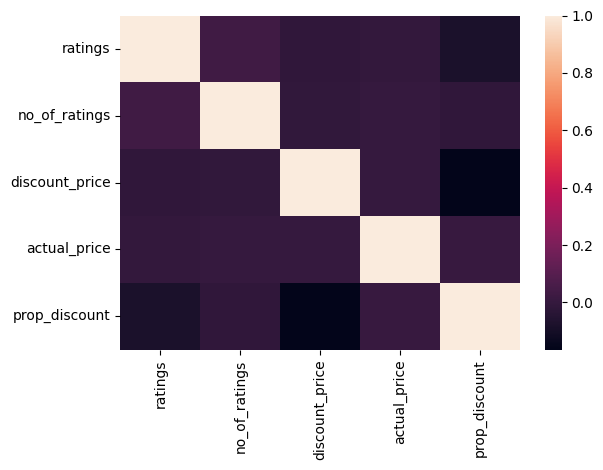

In [93]:
products.corr()

#heatmap that shows correlation across all numerical variables
sns.heatmap(data=products.corr(), annot=False)
plt.tight_layout()
plt.show()

To further check the correlations among numerical variables, this project breaks down the heatmap by each `main_category`. However, it still seems that there is little or no correlation between the `price` variables and the `ratings` variables across all main categories. <br/>
**It can be concluded that how the products are priced have little or no effect on how they are rated.**

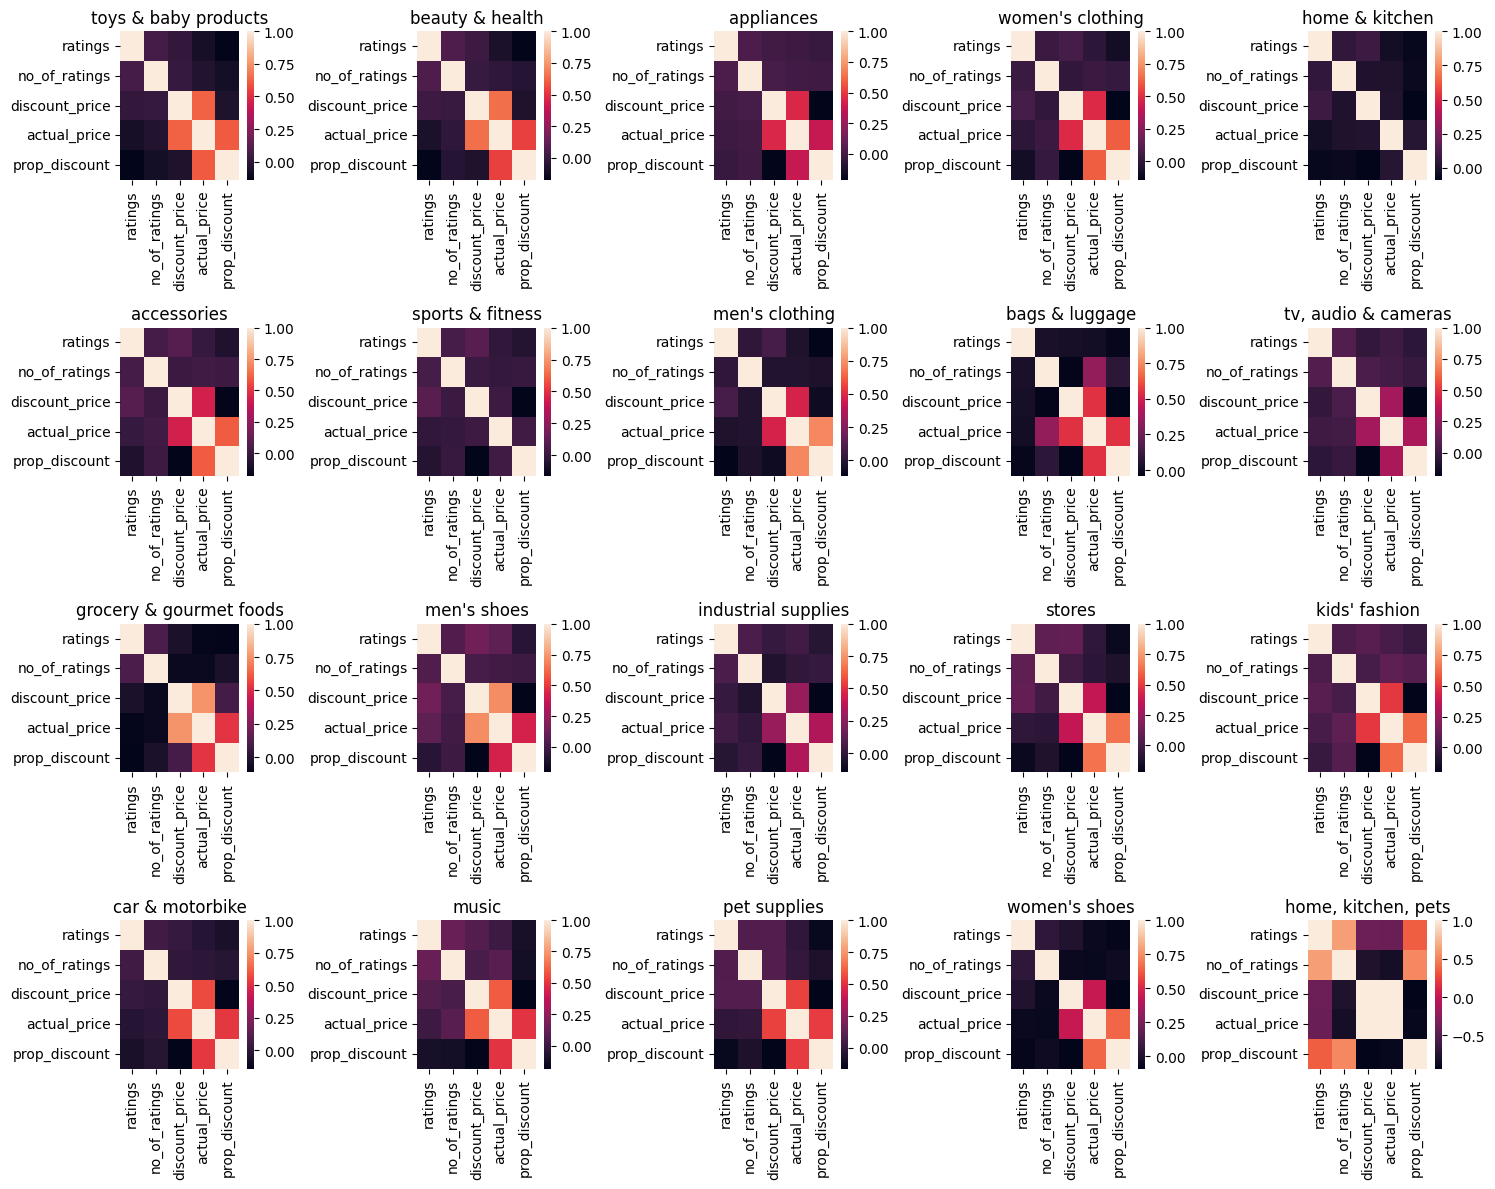

In [94]:
#plotting a heatmap for each main category
plot = 0
plt.figure(figsize=(15,12))
for category in main_categories:
  plot += 1
  plt.subplot(4, 5, plot)
  sns.heatmap(data=products[products.main_category == category].corr(), annot=False)
  plt.title(category)
plt.tight_layout()
plt.show()

### Ratings by main categories

Next, histograms are used to see how products are rated in general. The first look suggests that **almost all categories received good overall ratings** from the customers, most of which get over 3.5/5 points. However, it seems that the `Home, kitchen, pets` category has only a few products. <br/>
In order to compare these categories, side-by-side boxplots are used. It can be seen that while categories like `toys & baby products`, `beauty & health` and `grocery & gourmet foods` receive slightly better ratings, the metrics for categories like `home, kitchen, pets` and `shoes` (both men & women) are worse.

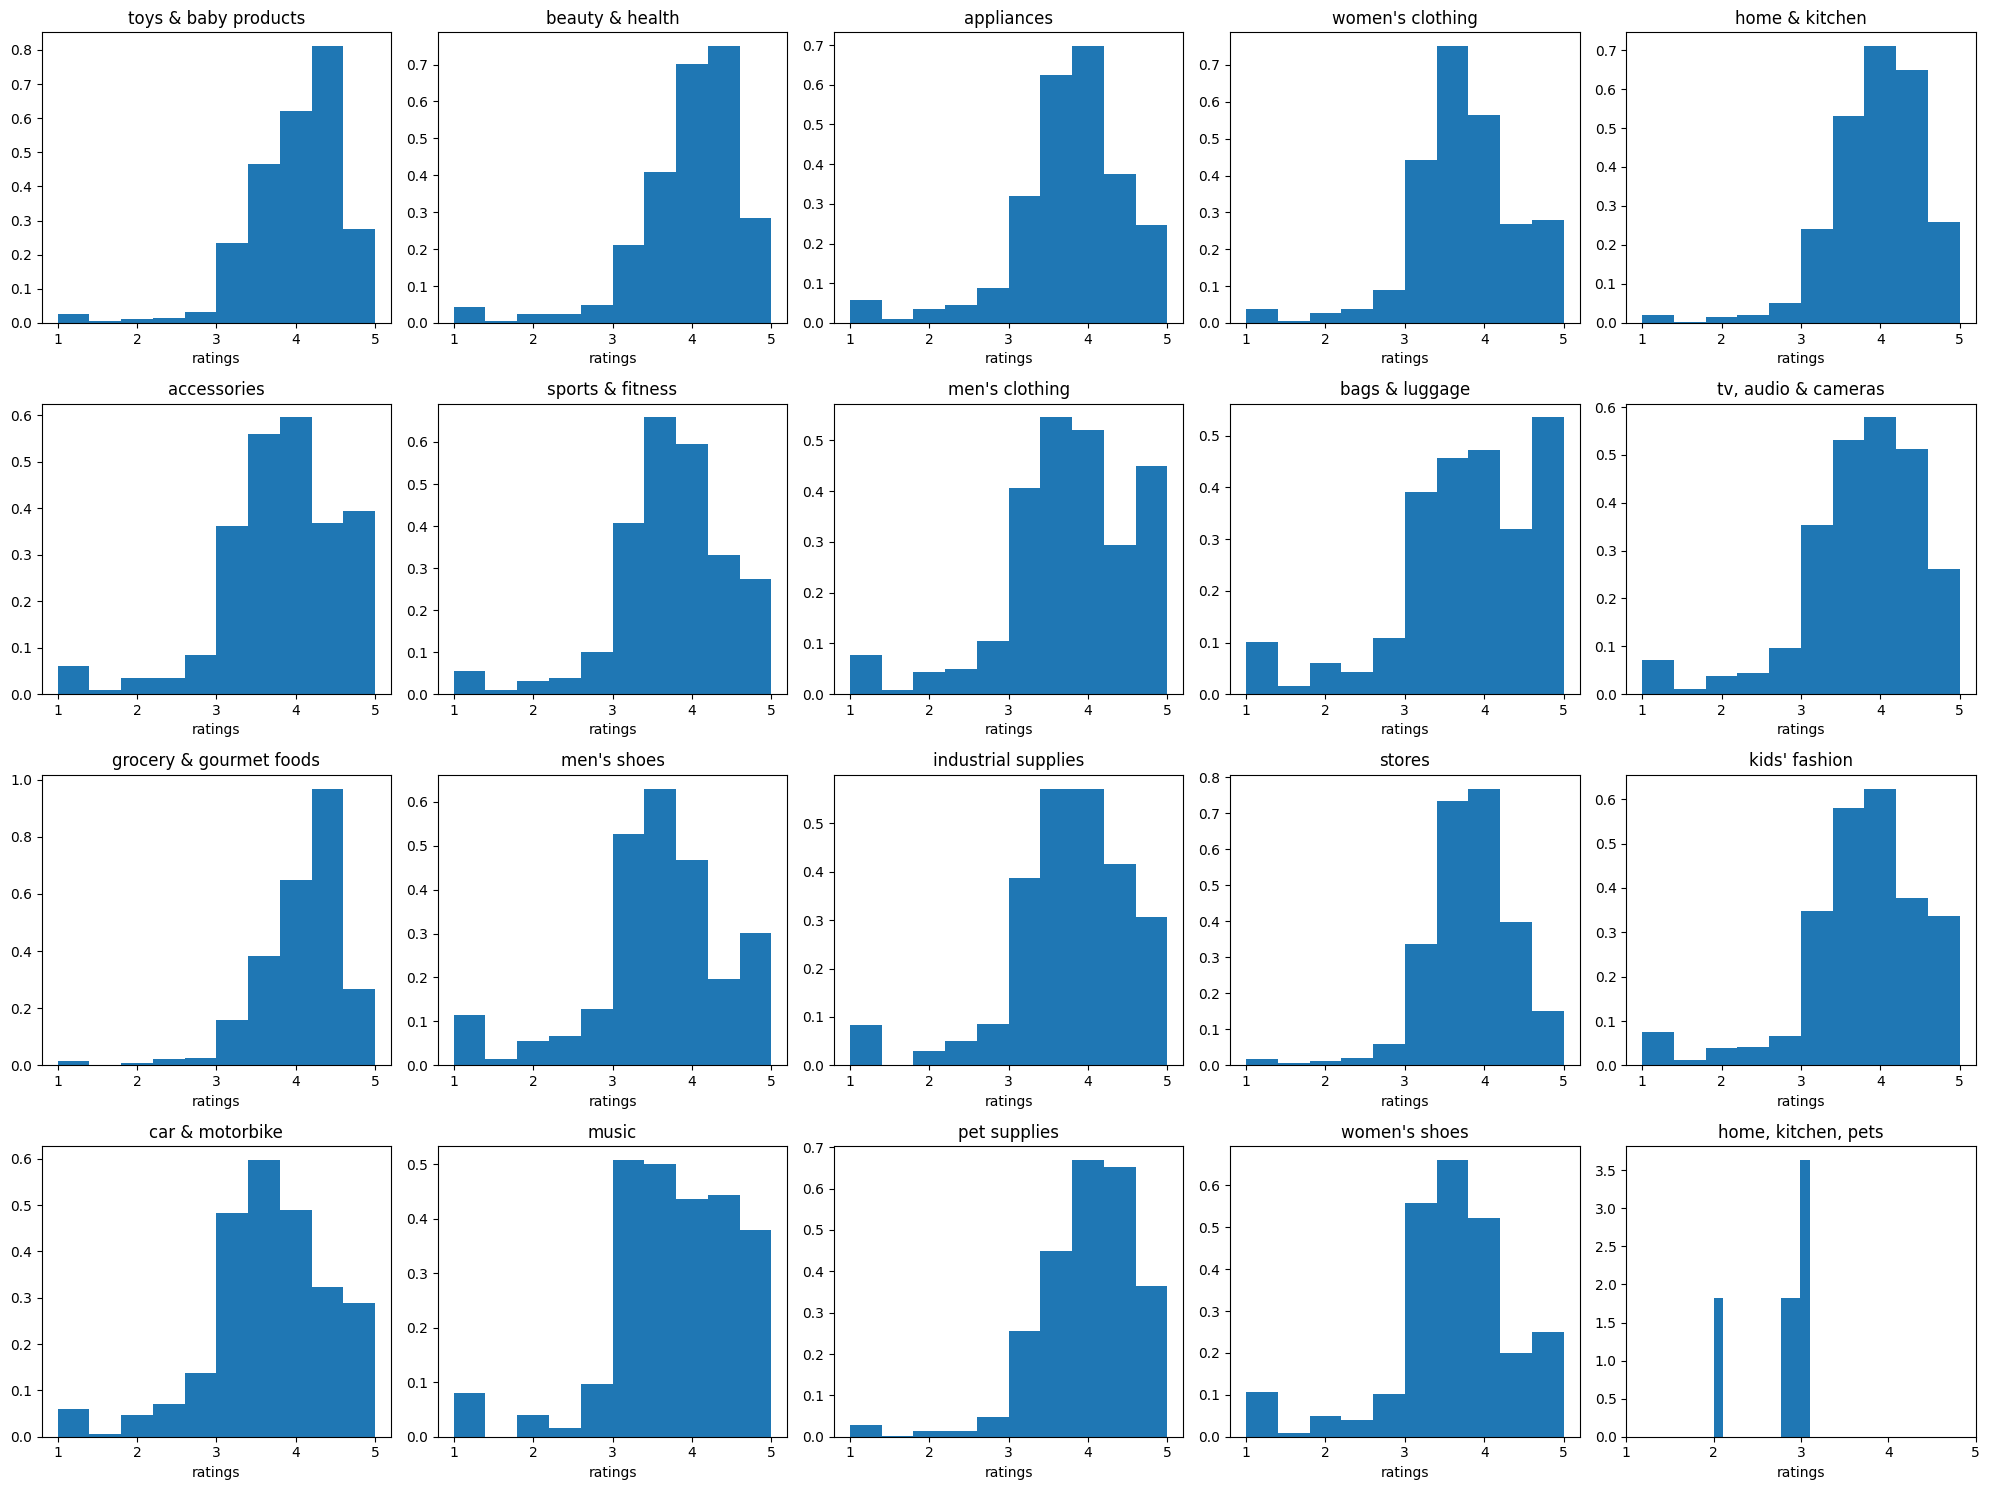

In [95]:
#plotting histograms for ratings by main categories
plot = 0
xtick = [1, 2, 3, 4, 5]
plt.figure(figsize=(20,15))
for category in main_categories:
  plot += 1
  ax = plt.subplot(4, 5, plot)
  plt.hist(products[(products.main_category == category)]['ratings'], label=category, bins=10, density=True)
  plt.title(category)
  ax.set_xticks(xtick)
  plt.xlabel('ratings')
plt.tight_layout()
plt.show()

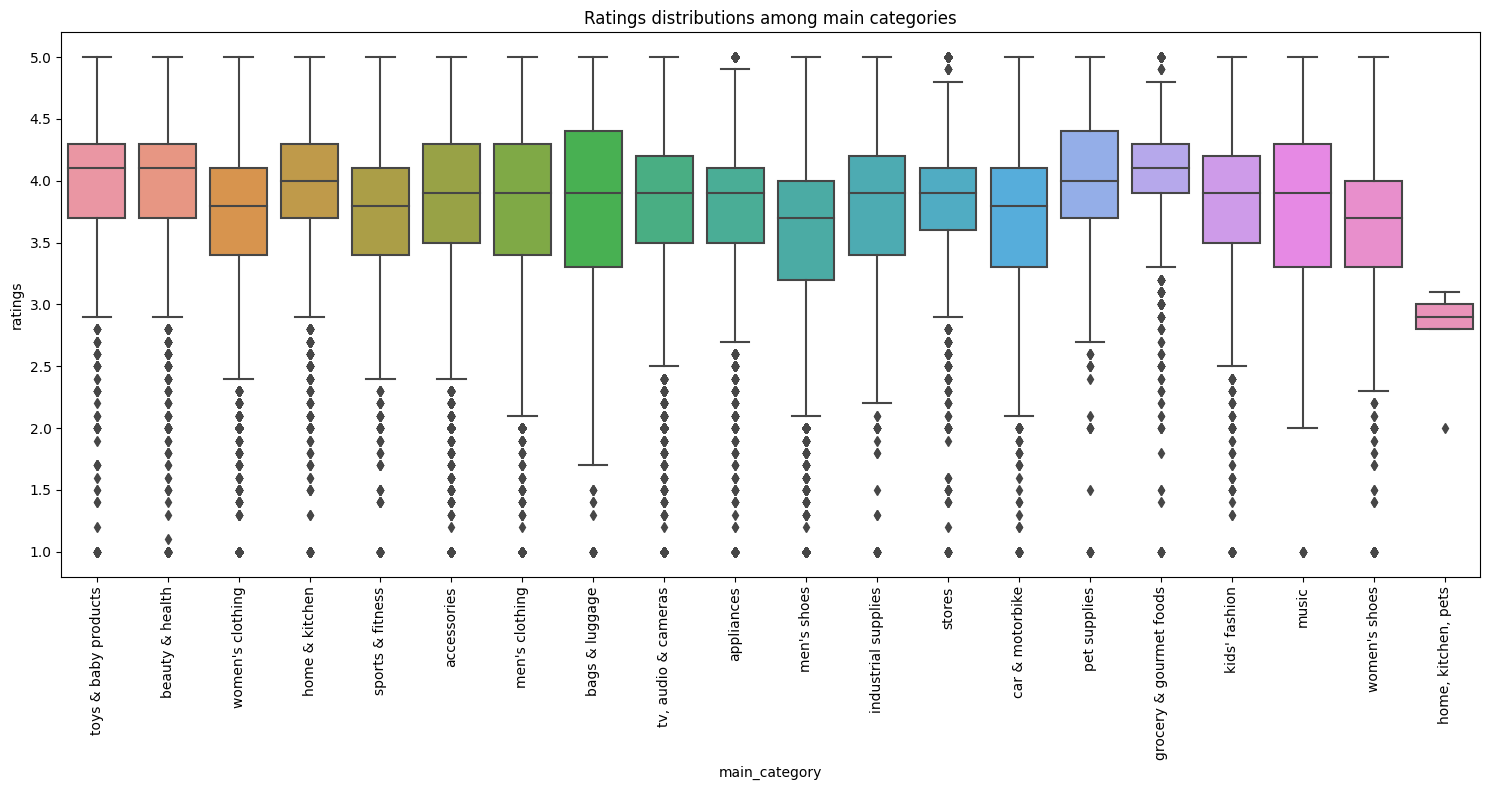

In [96]:
#plotting side-by-side boxplots for ratings by main categories
plt.figure(figsize=(15,8))
sns.boxplot(data=products, y=products.ratings, x=products.main_category)
plt.xticks(rotation=90)
plt.title('Ratings distributions among main categories')
plt.tight_layout()
plt.show()

To try to gain more insights, ratings by sub-categories are plotted with side-by-side boxplots. Here it can be observed that sub-categories like `Health & Personal Care` or `All Grocery & Gourmet Foods` have better ratings than the others. Sub-categories like `Suitcases & Trolley Bags` or `Televisions` have diversed ratings.

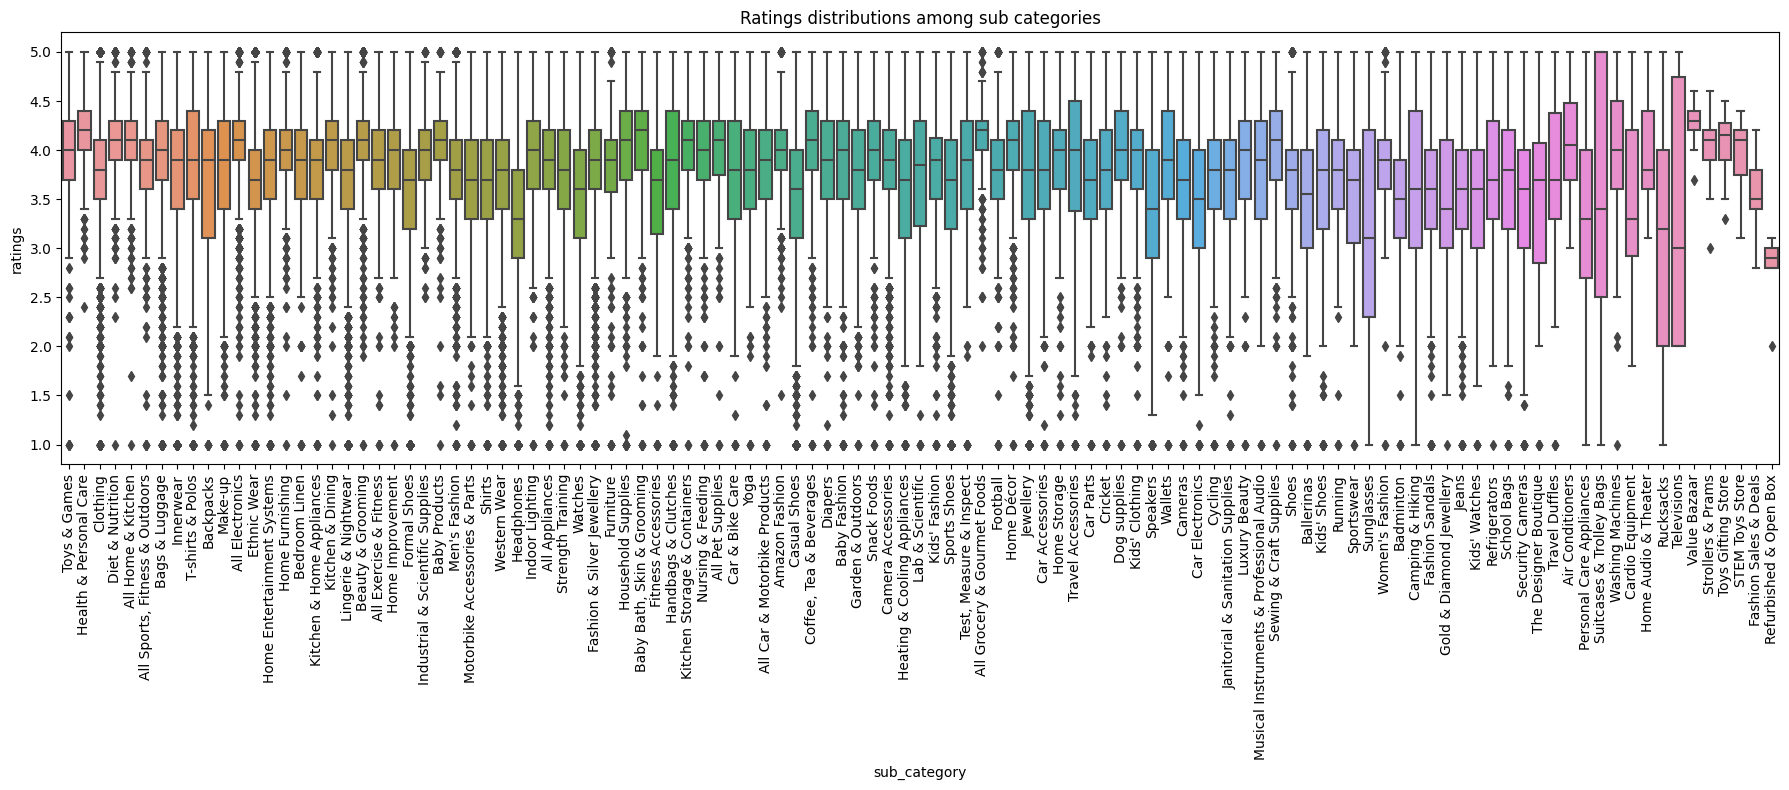

In [97]:
#plotting side-by-side boxplots for ratings by main categories
plt.figure(figsize=(18,8))
sns.boxplot(data=products, y=products.ratings, x=products.sub_category)
plt.xticks(rotation=90)
plt.title('Ratings distributions among sub categories')
plt.tight_layout()
plt.show()

### Discount rates among different categories

The same method is applied to examine the discount rates distribution among main categories and sub categories. It can be seen that `women's clothing`, `accessories` and `stores` products are discounted more frequently and at a higher rate when compared to categories like `grocery & gourmet foods`. <br/>
For sub-categories, while categories like `Ethnic Wear` or `Watches` are more frequently discounted at a high rate, products in categories like `Coffee, Tea & Beverages` or `Luxury Beauty` have generally lower rates.

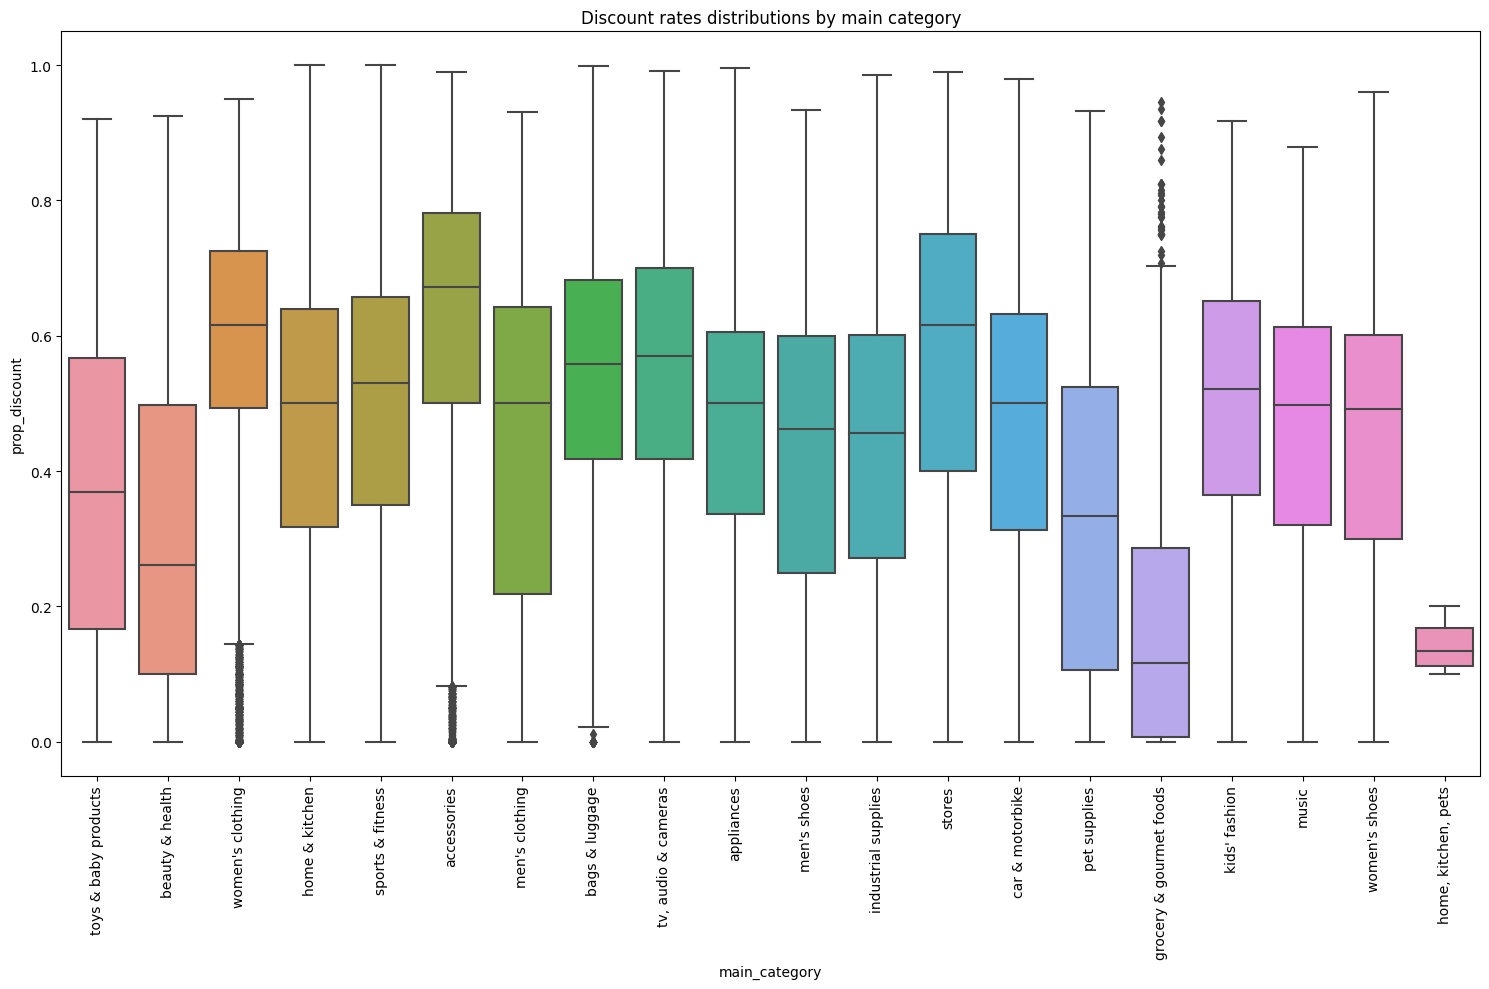

In [98]:
#plotting side-by-side boxplots for discount rates among main categories
plt.figure(figsize=(15,10))
sns.boxplot(data=products, y=products.prop_discount, x=products.main_category)
plt.xticks(rotation=90)
plt.title('Discount rates distributions by main category')
plt.tight_layout()
plt.show()

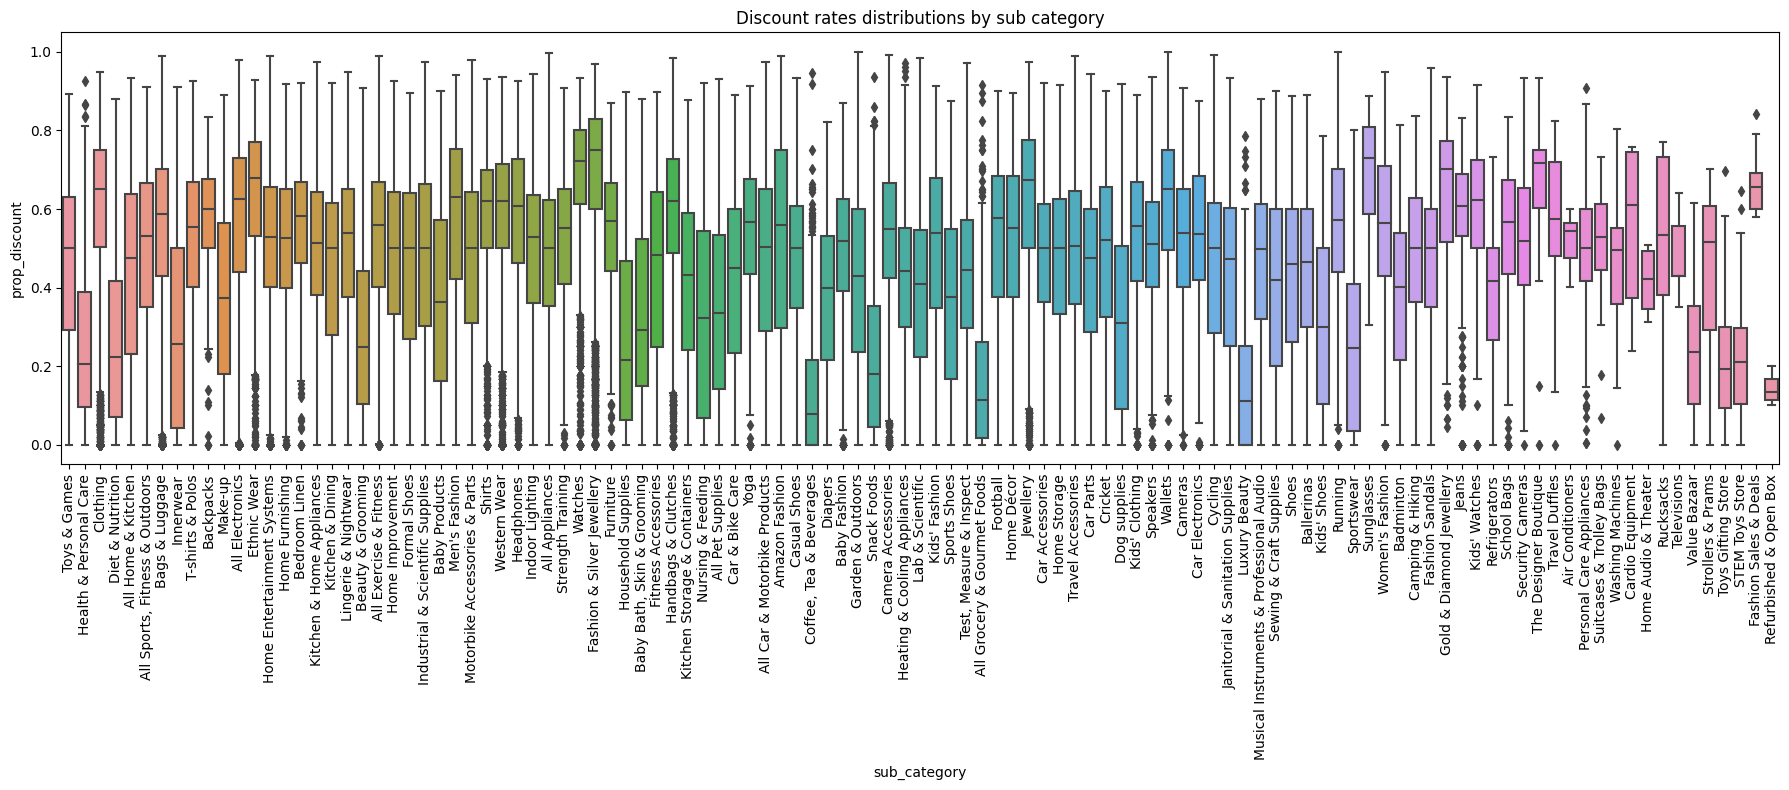

In [99]:
#plotting side-by-side boxplots for discount rates among sub categories
plt.figure(figsize=(18,8))
sns.boxplot(data=products, y=products.prop_discount, x=products.sub_category)
plt.xticks(rotation=90)
plt.title('Discount rates distributions by sub category')
plt.tight_layout()
plt.show()

### Total number of ratings by categories

In order to grasp the total number of ratings among different main categories, a DataFrame is created with a bar chart to visualize the data. It can be seen that `tv, audio & cameras` is the main category with the highest number of ratings. <br/>
The same method is applied for sub categories, where `All Electronics` is found to be the sub categories with the highest number of ratings.

In [100]:
#create a DataFrame that sums up total number of ratings by main categories
sum_no_of_ratings_main_cat = []
for i in main_categories:
  sum_no_of_ratings_main_cat.append(np.sum(products[products.main_category == i]['no_of_ratings']))

main_cat_total_no_of_ratings = pd.DataFrame(list(zip(main_categories, sum_no_of_ratings_main_cat)), columns = ['main_category', 'total_no_of_ratings']).sort_values(by=['total_no_of_ratings'], ascending=False)

print(main_cat_total_no_of_ratings.head(10)) #Examine the top 10 highest number of ratings

           main_category  total_no_of_ratings
9    tv, audio & cameras             44464680
13                stores              7842210
0   toys & baby products              7009895
1        beauty & health              6318745
3       women's clothing              5887859
4         home & kitchen              5549208
5            accessories              4939507
2             appliances              2132265
11           men's shoes              1999709
7         men's clothing              1479534


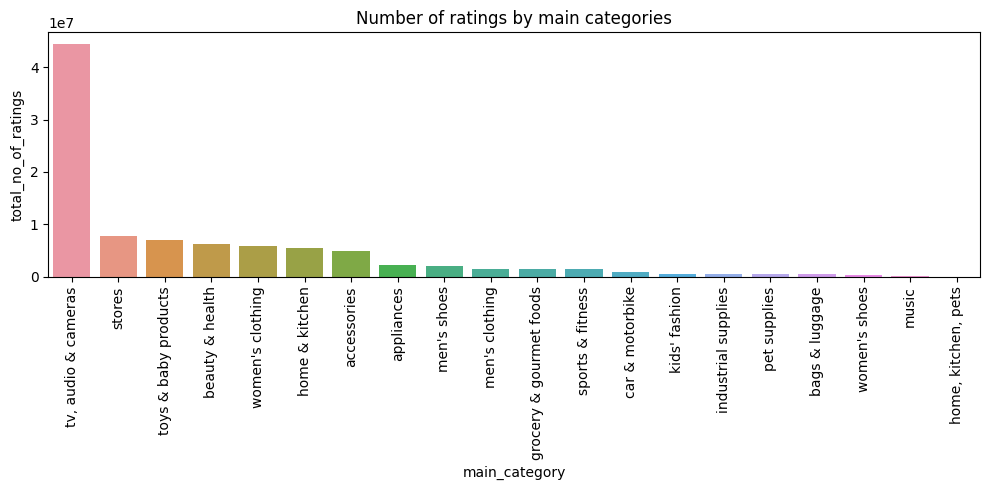

In [101]:
#visualize with a bar chart
plt.figure(figsize=(10,5))
sns.barplot(data=main_cat_total_no_of_ratings, x='main_category', y='total_no_of_ratings')
plt.xticks(rotation=90)
plt.title('Number of ratings by main categories')
plt.tight_layout()
plt.show()

In [102]:
#create a DataFrame that sums up total number of ratings by sub categories
sub_categories = products.sub_category.unique()
sum_no_of_ratings_sub_cat = []
for i in sub_categories:
  sum_no_of_ratings_sub_cat.append(np.sum(products[products.sub_category == i]['no_of_ratings']))

sub_cat_total_no_of_ratings = pd.DataFrame(list(zip(sub_categories, sum_no_of_ratings_sub_cat)), columns = ['sub_category', 'total_no_of_ratings']).sort_values(by=['total_no_of_ratings'], ascending=False)

print(sub_cat_total_no_of_ratings.head(10)) #Examine the top 10 highest number of ratings

                  sub_category  total_no_of_ratings
11             All Electronics             32868603
53          Camera Accessories              6562223
2                     Clothing              4327464
46              Amazon Fashion              4227537
24               Baby Products              3738484
25               Men's Fashion              3503531
13  Home Entertainment Systems              3392056
1       Health & Personal Care              2952520
6               Bags & Luggage              2886913
4           All Home & Kitchen              2616264


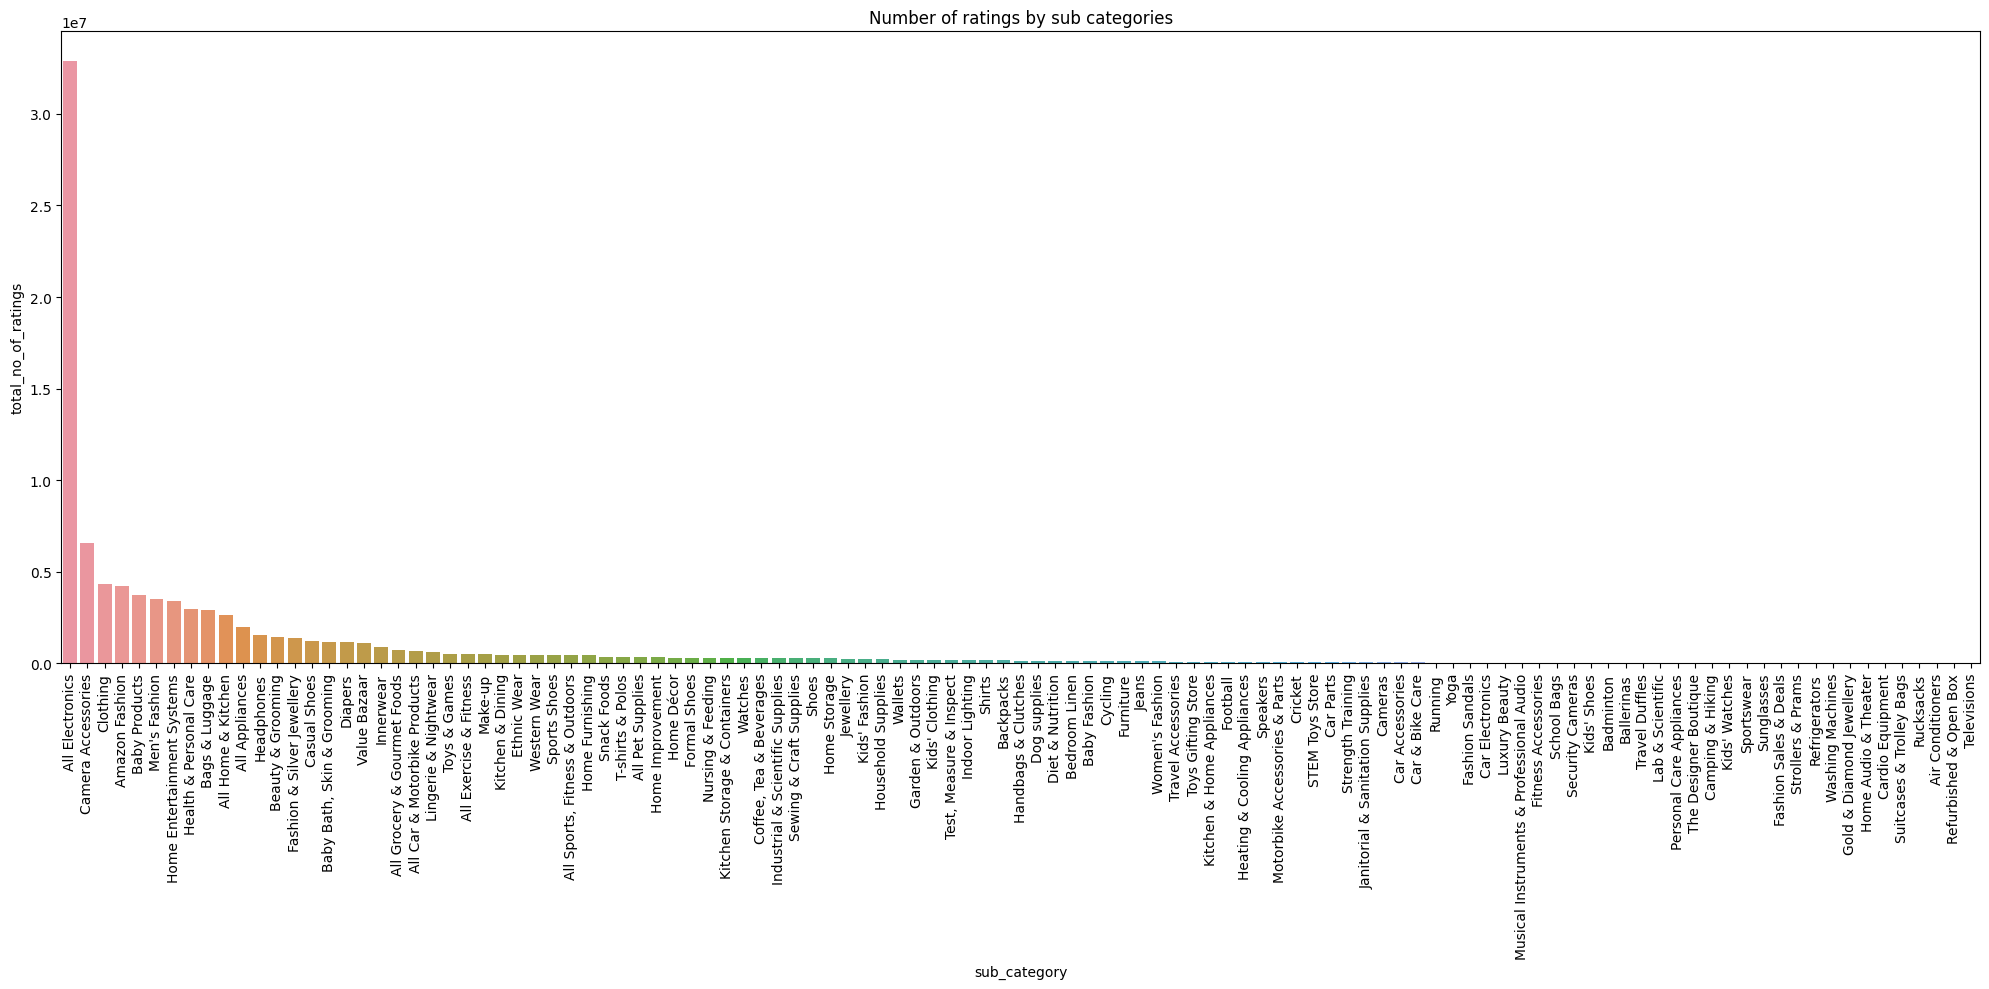

In [103]:
#visualize with a bar chart
plt.figure(figsize=(20,10))
sns.barplot(data=sub_cat_total_no_of_ratings, x='sub_category', y='total_no_of_ratings')
plt.xticks(rotation=90)
plt.title('Number of ratings by sub categories')
plt.tight_layout()
plt.show()

## Conclusions

It has been shown that how the products are priced or discounted does not have any clear influence on how they are rated or how many ratings they received. <br/>
<br/>
Meanwhile, categories like `toys & baby products`, `beauty & health` or `grocery & gourmet foods` received better ratings than others. On the other hand, products in these categories tend to have lower discount rates. `women's clothing`, `accessories` and `stores` are among the highest discount rates categories. In terms of the number of ratings, `tv, audio & cameras` has the highest figure for a main category while `All Electronics` is the highest for a sub category. <br/>
<br/>
These findings can be helpful for Amazon to conduct their own promotion strategy, focusing on product categories that attract customers the most. They can also be useful for those who are looking to sell on this platform.
